## Import libraries

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Import data

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Close']
tickers = data.columns.tolist()

[*********************100%***********************]  5 of 5 completed


## calculate log returns and clean data

**Log returns:**
$$ r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1}) $$
Where $P_t$ is price at day $t$.

We use log returns instead of simple returns because they have nice addative properties. 

In [3]:
log_returns = np.log(data/data.shift(1))
log_returns = log_returns.dropna()

## calculate covariance matrix

In [4]:
cov_matrix = log_returns.cov()

## calculate annual covariance matrix

In [5]:
cov_matrix_annual = log_returns.cov() * 252

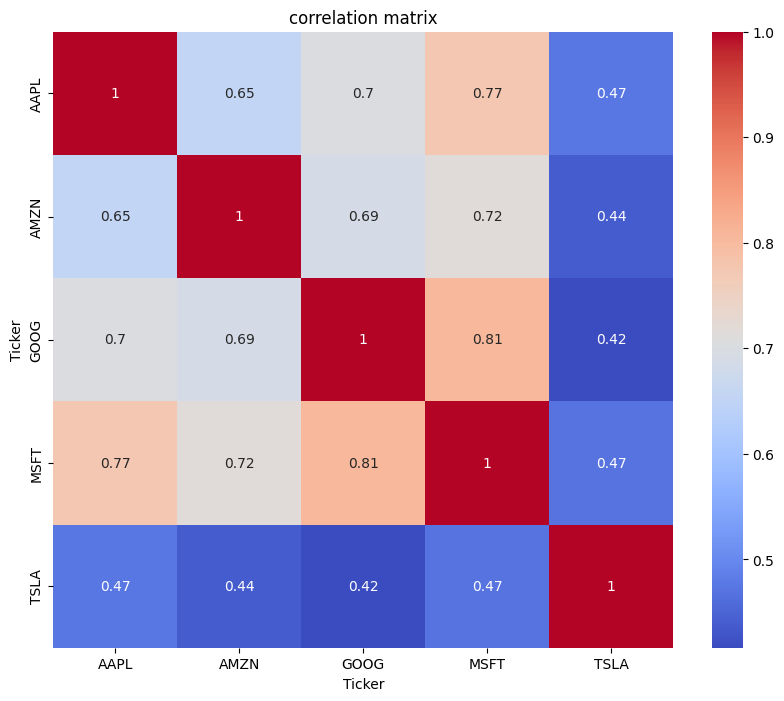

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(log_returns.corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

## Monte Carlo simulation for different portfolios

Portfolio return:
$$ E(R_p) = \sum_{i=1}^{n} w_i E(R_i) $$

**Variance of portfolio:**
$$ \sigma^2_p = w^T \cdot \Sigma \cdot w $$
Where:
* $w$ - weights vector
* $\Sigma$ covariance matrix
* $w^T$ - transposed weights vector

**Sharpe ratio:**
$$ S = \frac{R_p - R_f}{\sigma_p} $$
Where:
* $R_p$ - portfolio return
* $R_f$ - Risk Free Rate
* $\sigma_p$ - standard deviation of portfolio

=OPTIMAL PORTFOLIO==
Return: 24.74%
Volatility: 32.68%
Sharpe Ratio: 0.70
Weights:
  AAPL: 37.55%
  AMZN: 0.02%
  GOOG: 1.11%
  MSFT: 41.85%
  TSLA: 19.47%
===SAFE PORTFOLIO===
Return: 16.09%
Volatility: 29.09%
Weights:
  AAPL: 20.53%
  AMZN: 13.66%
  GOOG: 34.06%
  MSFT: 31.74%
  TSLA: 0.01%


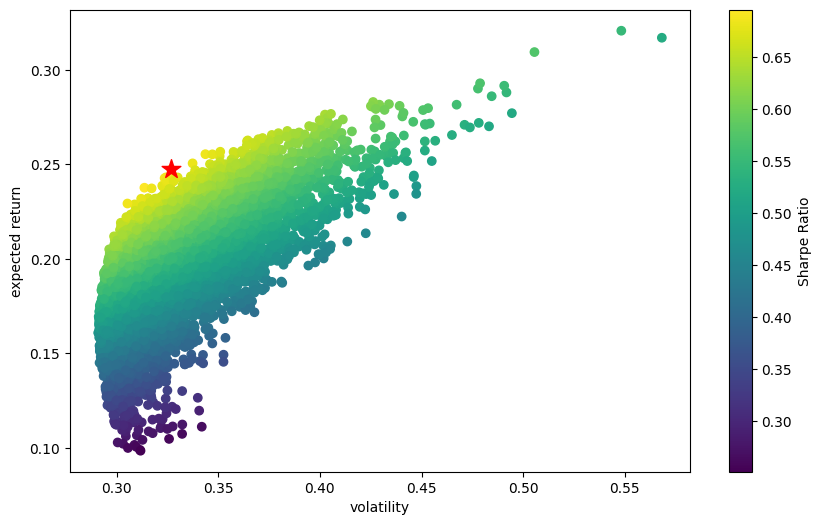

In [7]:
number_of_portfolios = 10000
RF = 0.02 # risk free constant

all_weights = []
portfolio_returns = []
portfolio_volatilities = []
sharpe_ratios = []

for x in range(number_of_portfolios):
    weights = np.random.random(len(tickers)) # generate random weights
    weights /= np.sum(weights) # divide the weights by their sum so they sum up to 1

    all_weights.append(weights) # save weights to list

    val_return = np.sum(weights * log_returns.mean()) * 252 # calculate expected value
    val_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_annual, weights))) # calculate the quadratic form and square to get SD

    portfolio_returns.append(val_return)
    portfolio_volatilities.append(val_volatility)
    sharpe_ratios.append((val_return - RF) / val_volatility)

max_sharpe_value = max(sharpe_ratios) # find max sharp ratio
max_sharpe_idx = sharpe_ratios.index(max_sharpe_value) # get position

min_vol_value = min(portfolio_volatilities) # find min volatility
min_vol_idx = portfolio_volatilities.index(min_vol_value) # get position

best_weights = all_weights[max_sharpe_idx]
safe_weights = all_weights[min_vol_idx]

print("OPTIMAL PORTFOLIO".center(20, '='))
print(f"Return: {portfolio_returns[max_sharpe_idx]:.2%}")
print(f"Volatility: {portfolio_volatilities[max_sharpe_idx]:.2%}")
print(f"Sharpe Ratio: {max_sharpe_value:.2f}")
print("Weights:")
for ticker, weight in zip(tickers, best_weights):
    print(f"  {ticker}: {weight:.2%}")

print("SAFE PORTFOLIO".center(20, '='))
print(f"Return: {portfolio_returns[min_vol_idx]:.2%}")
print(f"Volatility: {portfolio_volatilities[min_vol_idx]:.2%}")
print("Weights:")
for ticker, weight in zip(tickers, safe_weights):
    print(f"  {ticker}: {weight:.2%}")

# draw results
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(portfolio_volatilities[max_sharpe_idx], portfolio_returns[max_sharpe_idx], c='red', s=200, marker='*')
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.show()